# MAIN Notebook to compare different model results

## 1. Loading the dataset

In [1]:
# 1.1. Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
# 1.2. Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import joblib

In [3]:
# 1.3. Load the training, validation and test datasets into a dataframes 
# Load the Parquet files into DataFrames
X_train = pd.read_parquet('../data/processed/X_train.parquet')
X_val = pd.read_parquet('../data/processed/X_val.parquet')
y_train = pd.read_parquet('../data/processed/y_train.parquet')
y_val = pd.read_parquet('../data/processed/y_val.parquet')
X_test = pd.read_parquet('../data/processed/X_test_scaled.parquet')

In [4]:
# taking out the player id out of the test data
player_id_test = X_test.pop('player_id')

In [5]:
y_val = y_val.iloc[:, 0]  # Convert the single column DataFrame to a Series
y_val.shape

(9324,)

In [6]:
y_train = y_train.iloc[:, 0]  # Convert the single column DataFrame to a Series
y_train.shape

(37294,)

## 2. Load the saved models, fit and evaluate each of their performances

### 2.1 Load the Models

In [7]:
RamdomForest_Model = joblib.load('../models/randomForest.joblib')
GradientBoost_Model = joblib.load('../models/GB.joblib')
LogRegression_Model = joblib.load('../models/logisticRegression.joblib')
XGBoost_Model = joblib.load('../models/XGBoost.joblib')
adaBoost_Model = joblib.load('../models/ada.joblib')
svc_Model = joblib.load('../models/SVM_smote_linear.joblib')
decisionTree_Model = joblib.load('../models/decisionTree.joblib')

### 2.2 Predict the train and validation dataset's probabilities 

In [8]:
# Select the probability for the positive class (class 1) 
y_train_probs_rf = RamdomForest_Model.predict_proba(X_train)[:, 1]
y_val_probs_rf = RamdomForest_Model.predict_proba(X_val)[:, 1]

In [9]:
# Select the probability for the positive class (class 1) 
y_train_probs_gb = GradientBoost_Model.predict_proba(X_train)[:, 1]
y_val_probs_gb = GradientBoost_Model.predict_proba(X_val)[:, 1]

In [10]:
# Select the probability for the positive class (class 1) 
y_train_probs_logreg = LogRegression_Model.predict_proba(X_train)[:, 1]
y_val_probs_logreg = LogRegression_Model.predict_proba(X_val)[:, 1]

In [11]:
# Select the probability for the positive class (class 1) 
y_train_probs_ada = adaBoost_Model.predict_proba(X_train)[:, 1]
y_val_probs_ada = adaBoost_Model.predict_proba(X_val)[:, 1]

In [12]:
# Select the probability for the positive class (class 1) 
y_train_probs_svc = svc_Model.predict_proba(X_train)[:, 1]
y_val_probs_svc = svc_Model.predict_proba(X_val)[:, 1]

In [13]:
# Select the probability for the positive class (class 1) 
y_train_probs_xg = XGBoost_Model.predict_proba(X_train)[:, 1]
y_val_probs_xg = XGBoost_Model.predict_proba(X_val)[:, 1]

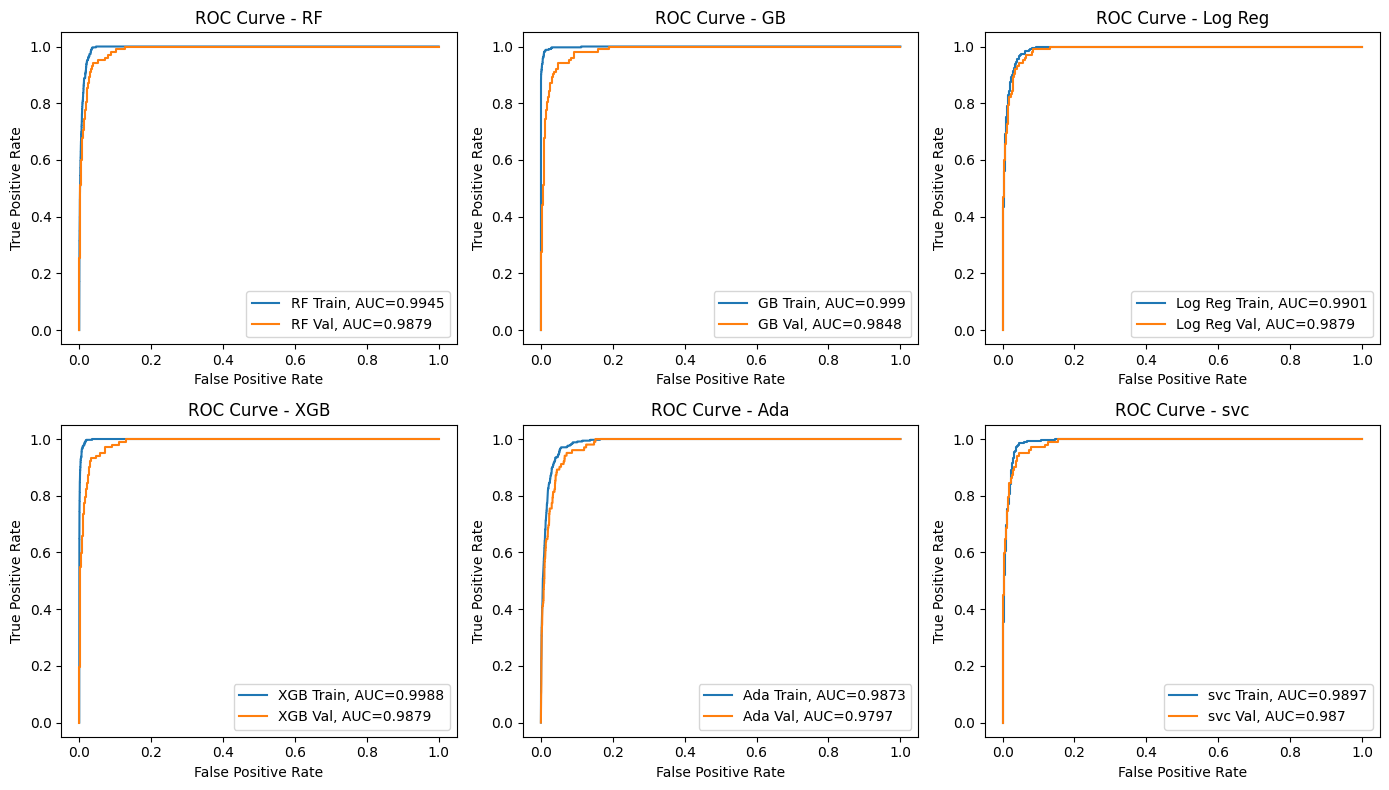

In [25]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Function to plot ROC curve on a given axis
def plot_roc_curve(ax, y_train, y_train_probs, y_val, y_val_probs, model_name):
    # Training ROC Curve
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_probs)
    auc_train = round(metrics.roc_auc_score(y_train, y_train_probs), 4)
    ax.plot(fpr_train, tpr_train, label=f"{model_name} Train, AUC={auc_train}")
    
    # Validation ROC Curve
    fpr_val, tpr_val, _ = metrics.roc_curve(y_val, y_val_probs)
    auc_val = round(metrics.roc_auc_score(y_val, y_val_probs), 4)
    ax.plot(fpr_val, tpr_val, label=f"{model_name} Val, AUC={auc_val}")
    
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()
    ax.set_title(f"ROC Curve - {model_name}")

# Set up plotting area with 2x2 subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Define models and their corresponding data
models = [
    ("RF", y_train, y_train_probs_rf, y_val, y_val_probs_rf),
    ("GB", y_train, y_train_probs_gb, y_val, y_val_probs_gb),
    ("Log Reg", y_train, y_train_probs_logreg, y_val, y_val_probs_logreg),
    ("XGB", y_train, y_train_probs_xg, y_val, y_val_probs_xg),
    ("Ada", y_train, y_train_probs_ada, y_val, y_val_probs_ada),
    ("svc", y_train, y_train_probs_svc, y_val, y_val_probs_svc)
]

# Plot ROC curves for each model
for ax, (model_name, y_train, y_train_probs, y_val, y_val_probs) in zip(axs.flatten(), models):
    plot_roc_curve(ax, y_train, y_train_probs, y_val, y_val_probs, model_name)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### 2.3 Predict the test dataset's probabilities of 4 models which had almost equal score for validation set prediction

In [15]:
# Save the probability of the test data 
y_test_probs_rf = RamdomForest_Model.predict_proba(X_test)[:, 1]

In [16]:
# Save the probability of the test data
y_test_probs_logreg = LogRegression_Model.predict_proba(X_test)[:, 1]

In [17]:
# Save the probability of the test data
y_test_probs_xg = XGBoost_Model.predict_proba(X_test)[:, 1]

In [26]:
# Save the probability of the test data
y_test_probs_svc = svc_Model.predict_proba(X_test)[:, 1]

In [27]:
# 3.5 add the 'player_id'column  into the prediction probability
# Convert y_test_prob_rf3 (which is a NumPy array) to a DataFrame
y_test_probs_df_rf = pd.DataFrame(y_test_probs_rf, columns=['drafted'])
y_test_probs_df_logreg = pd.DataFrame(y_test_probs_logreg, columns=['drafted'])
y_test_probs_df_xg = pd.DataFrame(y_test_probs_xg, columns=['drafted'])
y_test_probs_df_svc = pd.DataFrame(y_test_probs_svc, columns=['drafted'])

# Concatenate player_id_test and y_test_prob_df along the columns
Results_final_rf = pd.concat([player_id_test, y_test_probs_df_rf], axis=1)
Results_final_logreg = pd.concat([player_id_test, y_test_probs_df_logreg], axis=1)
Results_final_xg = pd.concat([player_id_test, y_test_probs_df_xg], axis=1)
Results_final_svc = pd.concat([player_id_test, y_test_probs_df_svc], axis=1)

In [28]:
#3.6 save the probability as CSV file

# Convert to DataFrame and save
pd.DataFrame(Results_final_rf).to_csv('../data/external/final/Results_final_rf.csv', index=False)
pd.DataFrame(Results_final_logreg).to_csv('../data/external/final/Results_final_logreg.csv', index=False)
pd.DataFrame(Results_final_xg).to_csv('../data/external/final/Results_final_xg.csv', index=False)
pd.DataFrame(Results_final_svc).to_csv('../data/external/final/Results_final_svc.csv', index=False)

In [31]:
print(
    "Though all three models had the same score for the validation dataset,\n"
    "the best score in Kaggle is for Support Vector Classifier Model - 0.98964.\n"
    "Random Forest and XGBoost are overfitting.\n"
    "Look how the curve for Logistic Regression and SVC is more convergent."
)

Though all three models had the same score for the validation dataset,
the best score in Kaggle is for SVC - 0.98964.
Random Forest and XGBoost are overfitting.
Look how the curve for Logistic Regression and SVC is more convergent.
